In [1]:

import seaborn as sns #for plotting and styling
import pandas as pd #for managing datasets
from matplotlib import pyplot as plt #for additional customisation

In [2]:
location = r"C:\Users\ANIRUDHAAA\Desktop\MBA\Data Science\Untitled Folder\netflix_titles\netflix_titles.csv"

In [3]:
df = pd.read_csv(location)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Missing values consist of
--> "director": not much practical use
--> "cast": will drop
--> "country" important, will take the mode of avalable countries and assign to missing values
--> "date_added" : similar treatment as country column
--> "rating" : only 7 missing cases which can be easily found on net so i will replace them manually

# understanding what content is available in what country


# data cleaning and manipulation


In [6]:
df.drop(['cast', 'director'], axis = 1, inplace = True)

In [7]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df[df['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [9]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}
for id, rate in rating_replacements.items():
    df.iloc[id,6] = rate
    
df['rating'].isna().sum()

0

In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['country_main']=df['country'].apply(lambda x : x.split(",")[0])
df['country_main'].head()


0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: country_main, dtype: object

There are many entries in the dataset in which the 'country' column consists of more than one value. We added a new column namely 'country_main' in which we consider only one country to make our analyis easier.

In [13]:
df['country_main'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Norway',
       'United Kingdom', 'Japan', 'South Korea', 'Italy', 'Canada',
       'Indonesia', 'Romania', 'Spain', 'Iceland', 'South Africa',
       'France', 'Portugal', 'Hong Kong', 'Argentina', 'Germany',
       'Denmark', 'Kenya', 'New Zealand', 'Pakistan', 'Australia',
       'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Jamaica', 'Be

In [83]:
countries = df['country_main'].unique()

print(countries)


['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland' 'Thailand' 'Nigeria' 'Norway' 'United Kingdom' 'Japan'
 'South Korea' 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa' 'France' 'Portugal' 'Hong Kong' 'Argentina' 'Germany'
 'Denmark' 'Kenya' 'New Zealand' 'Pakistan' 'Australia' 'China' 'Taiwan'
 'Netherlands' 'Philippines' 'United Arab Emirates' 'Iran' 'Israel'
 'Uruguay' 'Bulgaria' 'Mauritius' 'Lebanon' 'Colombia' 'Soviet Union'
 'Sweden' 'Malaysia' 'Ireland' 'Serbia' 'Finland' 'Peru' 'Chile' 'Ghana'
 'Saudi Arabia' 'Namibia' 'Russia' 'Belgium' 'Vietnam' 'Kuwait'
 'Czech Republic' 'Zimbabwe' 'Hungary' 'Venezuela' 'Cambodia' 'Austria'
 'West Germany' 'Slovenia' 'Switzerland' 'Jordan' 'Bangladesh' 'Georgia'
 'Puerto Rico' 'Senegal' 'Guatemala' 'Ukraine' 'Jamaica' 'Belarus'
 'Cyprus' 'Greece' 'Paraguay' 'Croatia' 'Somalia']


In [15]:
df.drop(['description'],axis = 1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,country_main
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,United States
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",Sweden
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",India
7784,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",United States
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Australia


In [16]:
ratings = df['rating'].unique()
ratings

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
#to count the number of  ratings in a movie
df.count(['Argentina'],axis = 7)

TypeError: count() got multiple values for argument 'axis'

In [18]:
"""#Argentina
#to count numbers of ratings in a movie

#

from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.pie(students, labels = ratings,autopct='%1.2f%%')
plt.show()"""

"#Argentina\n#to count numbers of ratings in a movie\n\n#\n\nfrom matplotlib import pyplot as plt\nimport numpy as np\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\nax.axis('equal')\n#langs = ['C', 'C++', 'Java', 'Python', 'PHP']\nstudents = [23,17,35,29,12]\nax.pie(students, labels = ratings,autopct='%1.2f%%')\nplt.show()"

In [35]:
#i want to understand what content 'rating' is available in what country
#so i will make a graph where x-axis is ratings and then on y axis we will have total number of that ratings and my aim is to find which country has the most number of what rated movies
## this way we can understand which countries are ok with family friendly movies only and which countries are ok with R rated movies. SO the culture can be guessed.
#sum_array = []
#sum1 = 0
#for countries in df:
#    for ratings in df:
#        if ratings == df['Country'['ratings']]:
#            sum1 = sum1+1
            
#    sum_array.append(sum1)
#    sum1 = 0
df.rating.value_counts()

TV-MA       2867
TV-14       1932
TV-PG        807
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            85
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

1. to know how many shows/movies are of what ratings and which rating dominates
2. to know how many are movies and how many are shows
3. to know which countries have most content
4. to know which countries have most mature content and which has the least

In [19]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_main
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States


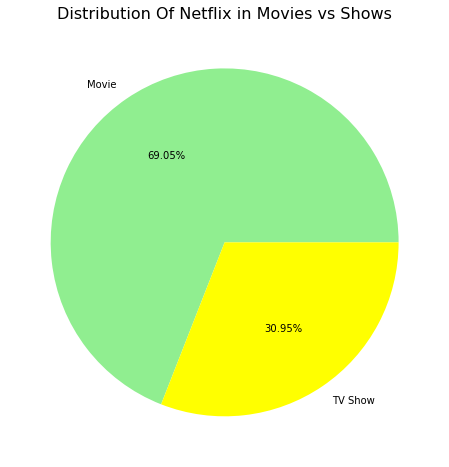

In [39]:
dt = df.type.value_counts().reset_index()
plt.figure(figsize = (8,8))
plt.pie(df.type.value_counts(), labels = dt['index'], autopct = '%.2f%%', colors = ['lightgreen' , 'yellow'])
plt.title('Distribution Of Netflix in Movies vs Shows' , fontsize = 16)
plt.show()

In [36]:
#Now i will calculate the distribution of content as per rating

<function matplotlib.pyplot.show(close=None, block=None)>

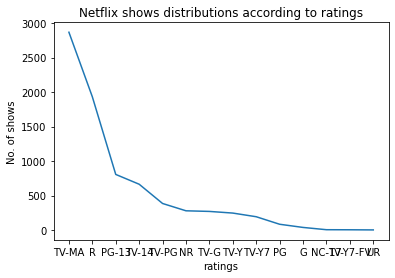

In [47]:
x = ratings
y = df.rating.value_counts()
plt.plot(x,y)
plt.xlabel('ratings')
plt.ylabel('No. of shows')
plt.title('Netflix shows distributions according to ratings')
plt.show

We see that the mature and R rated content dominate Netflix compared to PG. Thus the mature audience is the primary target audience of netflix

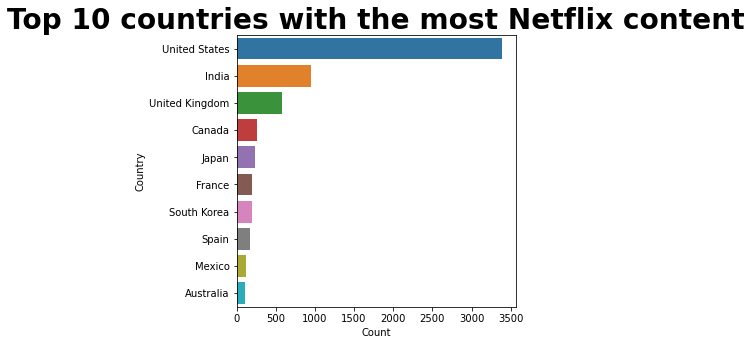

In [71]:
data_1 = df['country_main'].value_counts().reset_index().head(10)
data_1.columns = ['Country' , 'Count']

plt.figure(figsize = (5,5))
sns.barplot(x = 'Count' , y = 'Country' , data = data_1)
plt.title('Top 10 countries with the most Netflix content' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 28 })
plt.show()

In [81]:
#To calculate which countries have the most matured content
df_2 = df[df['rating'] == 'TV-MA']
df_2.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_main
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,07:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt
9,s10,Movie,1920,India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India


In [85]:
import numpy as np


ValueError: x and y must have same first dimension, but have shapes (81,) and (70,)

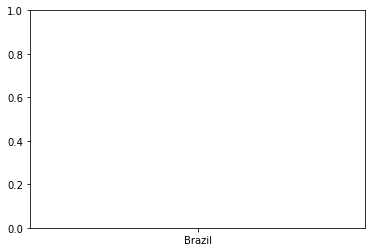

In [103]:
x = np.array(countries)
y = np.array(df_2.country.value_counts())
plt.plot(x,y)
plt.xlabel('ratings')
plt.ylabel('No. of shows')
plt.title('Netflix shows distributions according to ratings')
plt.show()